## <img src="./logo_UTN.svg" align="right" width="150" /> 
#### Procesamiento Digital de Señales

# Trabajo Práctico 3
#### Nombre y Apellido

***
## Estimación espectral


In [1]:
## Inicialización del Notebook del TP3

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from pandas import DataFrame
from IPython.display import HTML

fs = 1000 # Hz

# Insertar aquí el código para inicializar tu notebook
########################################################
from Funciones import *
from math import log10, floor
def round_sig(x, sig=2):
    return round(x, sig-int(floor(log10(abs(x))))-1)

<div class="alert alert-block alert-info">
<b>1)</b> Compruebe experimentalmente las propiedades de sesgo y varianza del periodograma.
</div>

<div class="alert alert-block alert-success">
<b>Ayuda:</b> Puede utilizar una señal aleatoria con valores normalmente distribuidos de media nula y varianza **NO** unitaria, es decir $ x \sim \mathcal{N}(\mu=0,\sigma^2=2)$

</div>

Es decir, que el periodograma es un estimador de la densidad de potencia espectral (Ver Hayes 8.2.2):

$$ \hat{P_P}(e^{\frac{2\pi·k·f_S}{N}}) = \hat{P_P}(k) = \frac{1}{N}· \lvert X(k) \rvert ^2  $$

 + **no sesgado asintóticamente** a medida que aumenta la ventana de registro N.
 + tiene varianza constante y **NO** depende de N.

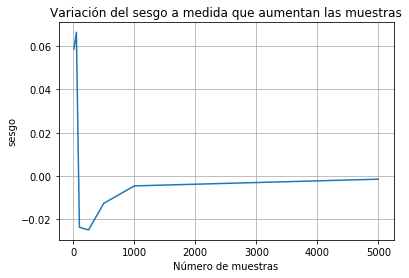

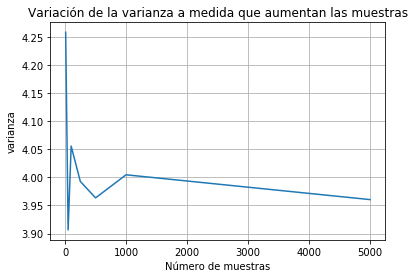

In [2]:
rep = 200
N = np.array([10, 50, 100, 250, 500, 1000, 5000], dtype=int)
mu = 0
sigma2 = 2

sesgo = np.zeros(len(N))
varianza = np.zeros(len(N))

for j in range(len(N)):
    noise = np.random.normal(mu, np.sqrt(sigma2), (rep,N[j])) #Realizaciones

    PSDx = (abs(np.fft.fft(noise,axis=1))**2)/N[j]
    PSDp = np.mean(PSDx,axis=0)
    PSDvar = np.var(PSDx,axis=0)
    varianza[j] = np.mean(PSDvar,axis=0)
    var = 0
    for i in range(N[j]):
        var += PSDp[i]**2
    var /= N[j]
    sesgo[j] = sigma2-var**0.5

PrintArb(N,sesgo,'Número de muestras','sesgo','Variación del sesgo a medida que aumentan las muestras')
PrintArb(N,varianza,'Número de muestras','varianza','Variación de la varianza a medida que aumentan las muestras')


In [3]:
tus_resultados = [ 
                   [round_sig(sesgo[0],3), round_sig(varianza[0],4)], # <-- acá debería haber numeritos :)
                   [round_sig(sesgo[1],3), round_sig(varianza[1],4)], # <-- acá debería haber numeritos :)
                   [round_sig(sesgo[2],3), round_sig(varianza[2],4)], # <-- acá debería haber numeritos :)
                   [round_sig(sesgo[3],3), round_sig(varianza[3],4)], # <-- acá debería haber numeritos :)
                   [round_sig(sesgo[4],3), round_sig(varianza[4],4)], # <-- acá debería haber numeritos :)
                   [round_sig(sesgo[5],3), round_sig(varianza[5],4)], # <-- acá debería haber numeritos :)
                   [round_sig(sesgo[6],3), round_sig(varianza[6],4)], # <-- acá debería haber numeritos :)
                 ]
df = DataFrame(tus_resultados, columns=['$s_P$', '$v_P$'],
               index=N)
HTML(df.to_html())


,$s_P$,$v_P$
10,0.05870,4.258
50,0.06650,3.907
100,-0.02380,4.056
250,-0.02500,3.993
500,-0.01270,3.964
1000,-0.00465,4.005
5000,-0.00154,3.960


<div class="alert alert-block alert-info">
<b>2)</b>     Compruebe del mismo modo los resultados de sesgo y varianza vistos en la teoría del método de Bartlett.

</div>

Es decir, que el periodograma de Bartlett es un estimador de la densidad de potencia espectral que promedia K bloques disjuntos de las N muestras de una señal $x$ (Ver Hayes 8.2.4):

$$ \hat{P_B}(k) = \frac{1}{N}· \sum^{K-1}_{i=0} \lvert X(k) \rvert ^2  $$

 + **no sesgado asintóticamente** a medida que aumenta la ventana de registro N.
 + tiene varianza que decrece asintóticamente a medida que aumenta K.
 + tiene una resolución espectral K veces menor

In [4]:
# Simular para los siguientes tamaños de señal
N = np.array([10, 50, 100, 250, 500, 1000, 5000], dtype=np.float)

##########################################
# Acá podés generar los gráficos pedidos #
##########################################


In [5]:

#######################################
# Tu simulación que genere resultados #
#######################################

tus_resultados = [ 
                   ['', ''], # <-- acá debería haber numeritos :)
                   ['', ''], # <-- acá debería haber numeritos :)
                   ['', ''], # <-- acá debería haber numeritos :)
                   ['', ''], # <-- acá debería haber numeritos :)
                   ['', ''], # <-- acá debería haber numeritos :)
                   ['', ''], # <-- acá debería haber numeritos :)
                   ['', ''], # <-- acá debería haber numeritos :)
                 ]
df = DataFrame(tus_resultados, columns=['$s_B$', '$v_B$'],
               index=N)
HTML(df.to_html())


,$s_B$,$v_B$
10.0,,
50.0,,
100.0,,
250.0,,
500.0,,
1000.0,,
5000.0,,


<div class="alert alert-block alert-info">
<b>3)</b>     Compruebe del mismo modo los resultados de sesgo y varianza vistos en la teoría del método de Welch.

</div>

Es decir, que el periodograma de Welch es un estimador de la densidad de potencia espectral que promedia K bloques ventaneados por $w(n)$, posiblemente solapados de las N muestras de una señal $x$ (Ver Hayes 8.2.5):

$$ \hat{P_W}(k) = \frac{1}{K·L·U}· \sum^{K-1}_{i=0} \Bigg\vert \sum^{L-1}_{n=0}  x(n+i·D) · w(n) · e^{-j2\pi·k·n·\frac{f_S}{N}} \Bigg\vert^2   $$

 + **no sesgado asintóticamente** a medida que aumenta la ventana de registro N.
 + tiene varianza que decrece asintóticamente, a medida que se promedian más bloques de señal.
 + tiene una resolución espectral inversamente proporcional al tamaño del bloque.

In [6]:
# Simular para los siguientes tamaños de señal
N = np.array([10, 50, 100, 250, 500, 1000, 5000], dtype=np.float)

##########################################
# Acá podés generar los gráficos pedidos #
##########################################


In [7]:

#######################################
# Tu simulación que genere resultados #
#######################################

tus_resultados = [ 
                   ['', ''], # <-- acá debería haber numeritos :)
                   ['', ''], # <-- acá debería haber numeritos :)
                   ['', ''], # <-- acá debería haber numeritos :)
                   ['', ''], # <-- acá debería haber numeritos :)
                   ['', ''], # <-- acá debería haber numeritos :)
                   ['', ''], # <-- acá debería haber numeritos :)
                   ['', ''], # <-- acá debería haber numeritos :)
                 ]
df = DataFrame(tus_resultados, columns=['$s_W$', '$v_W$'],
               index=N)
HTML(df.to_html())


,$s_W$,$v_W$
10.0,,
50.0,,
100.0,,
250.0,,
500.0,,
1000.0,,
5000.0,,


<div class="alert alert-block alert-info">
<b>4)</b> Evalue el siguiente estimador de frecuencia de una senoidal contaminada por ruido incorrelado.

</div>

Para una señal $ x(k) = a_1 · \mathop{sen}(\Omega_1·k) + n(k)$

siendo 

  $\Omega_1 = \Omega_0 + f_r·\frac{2\pi}{N} $

  $\Omega_0 = \frac{\pi}{2} $
  
y las variables aleatorias definidas por

  $f_r \sim \mathcal{U}(-\frac{1}{2}, \, \frac{1}{2}) $

  $n \sim \mathcal{N}(0, \, \sigma ^2) $
  
Evalúe el siguiente estimador 

  $\hat{\Omega}_1 = \mathop{arg\ max}_f \{ \hat{P_P} \} $

  $\hat{\Omega}_2 = \mathop{arg\ max}_f \{ \hat{P_W} \} $

Para relaciones de SNR en el que el pico de la senoidal esté 3 y 10 db por encima del *piso* de ruido. Considere 200 realizaciones de 1000 muestras para cada experimento.


In [8]:
# Simular para los siguientes tamaños de señal

R = 200 # realizaciones

N = 1000 # Muestras

# Obtené los valores XX para que cumplas con el enunciado
#SNR = np.array([ XX, XX ], dtype=np.float)

##########################################
# Acá podés generar los gráficos pedidos #
##########################################


   a) ¿Qué indicador considera que sería apropiado para poder comparar el rendimiento de ambos estimadores?


<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Escriba aquí su respuesta.
</div>

In [9]:

#######################################
# Tu simulación que genere resultados #
#######################################

# Una vez definido tu indicador de performance
tus_resultados = [ 
                   ['', ''], # <-- acá debería haber numeritos :)
                   ['', ''] # <-- acá debería haber numeritos :)
                 ]
df = DataFrame(tus_resultados, columns=['$i_1$', '$i_2$'],
               index=[  
                        '3 dB',
                        '10 dB'
                     ])
HTML(df.to_html())


,$i_1$,$i_2$
3 dB,,
10 dB,,
